In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We load the results from snippy:

In [2]:
df_mut = pd.read_csv("../Data/mutations_all.csv.gz", dtype={"strain": str, "ref_strain": str})
df_mut

,CHROM,POS,TYPE,REF,ALT,EVIDENCE,FTYPE,STRAND,NT_POS,AA_POS,EFFECT,LOCUS_TAG,GENE,PRODUCT,strain,condition,ref_strain
0,1,86891,snp,G,A,A:200 G:0,CDS,-,1992/3099,664/1032,synonymous_variant c.1992C>T p.Thr664Thr,IAFHHIEI_00077,ppkA,serine/threonine protein kinase PpkA,083.2,M,083.2
1,1,115931,snp,A,G,G:223 A:0,CDS,+,1874/2226,625/741,missense_variant c.1874A>G p.Asn625Ser,IAFHHIEI_00097,NaN,vgrG1b,083.2,M,083.2
2,1,253464,snp,A,G,G:162 A:0,CDS,+,356/792,119/263,missense_variant c.356A>G p.Asn119Ser,IAFHHIEI_00228,pcaD,beta-ketoadipate enol-lactone hydrolase,083.2,M,083.2
3,1,294262,snp,A,G,G:186 A:0,CDS,+,296/750,99/249,missense_variant c.296A>G p.Glu99Gly,IAFHHIEI_00264,NaN,hypothetical protein,083.2,M,083.2
4,1,298095,snp,C,T,T:192 C:0,CDS,+,94/1158,32/385,missense_variant c.94C>T p.Pro32Ser,IAFHHIEI_00266,NaN,hypothetical protein,083.2,M,083.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019335,1,7140355,snp,C,T,T:142 C:0,CDS,-,319/408,107/135,missense_variant c.319G>A p.Gly107Ser,PBLBKNGO_06660,rnpA,ribonuclease P protein component,816.3,P,804.2
3019336,1,7140435,mnp,AC,GT,GT:121 AC:0,CDS,-,239/408,80/135,missense_variant c.238_239delGTinsAC p.Val80Thr,PBLBKNGO_06660,rnpA,ribonuclease P protein component,816.3,P,804.2
3019337,1,7140987,snp,T,C,C:133 T:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,816.3,P,804.2
3019338,1,7141019,snp,C,T,T:133 C:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,816.3,P,804.2


Next, we count the number of unique mutations per condition and per strain - reference strain pairing. We also pivot the table for easier plotting using a heatmap:

In [3]:
df_mut_num = (
    df_mut
    .groupby(["condition", "strain", "ref_strain"], as_index=False)
    .nunique()
    .pivot(index=["condition", "ref_strain"], columns="strain", values="GENE")
    .reset_index()
    .sort_values(["condition", "ref_strain"], ascending=[False, False])
)

Finally, we plot:

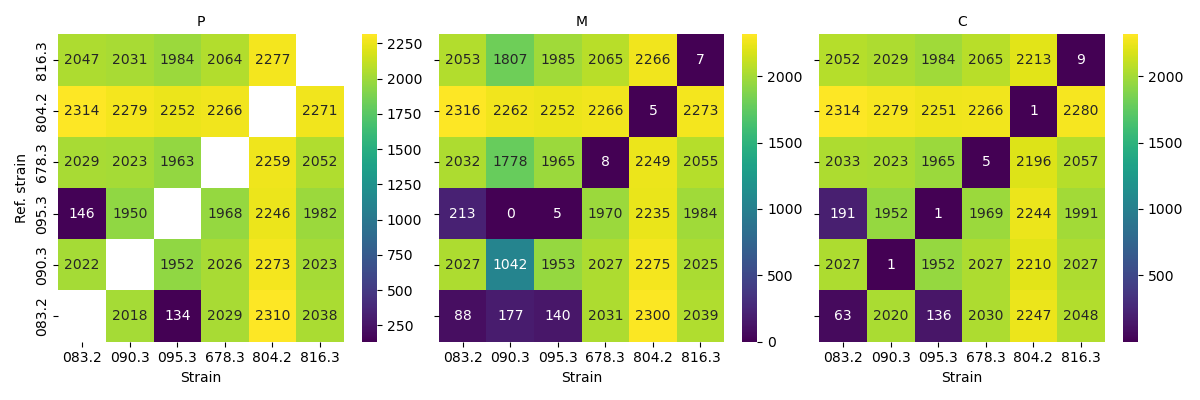

In [4]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.drop(columns="condition").set_index("ref_strain")
    return sns.heatmap(d, **kwargs)

g = (
    sns.FacetGrid(df_mut_num, col="condition", height=4)
    .map_dataframe(draw_heatmap, cmap="viridis", annot=True, fmt=".0f")
    .set_titles(col_template="{col_name}")
    .set(xlabel="Strain", ylabel="Ref. strain")
)